# Fig 4: NFW profile normalised Fourier transforms

This notebook makes figure 4 in the halo model review `(Asgari,Heymans and Mead 2022)`.

In [2]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt

# Imports from the halo model repo
import utility_functions as utility
import halomodel as halomod

In [3]:
# Parameters

# k range
kmin = 1e-1; kmax = 1e1
nk = 129

# Halo parameters
M_fid = 1e14

rk = 1.

# Cosmology
Dv = 330.
Om_m = 0.3
z = 0.

Setup values for an NFW profile:
$\rho(r)=\frac{\rho_{\rm s}}{r/r_{\rm s}(1+r/r_{\rm s})^2}$
The halo is truncated at the virial radius, `rv_fid` and $r_{\rm s}$ is defined using $r_{\rm s}= r_{\rm v}/c$, where c is the concentraion, taken from [Duffy et al. (2008)](https://arxiv.org/abs/0804.2486).

In [4]:
# Fiducial values

# find the virial radius for the given halo mass: M_fid, halo definition: Dv and matter density parameter: Om_m
rv_fid = halomod.virial_radius(M_fid, Dv, Om_m)
# find concentration 
c_fid = halomod.conc_Duffy(M_fid, z, halo_definition='Mvir')
rs_fid = rv_fid/c_fid
kv_fid = rk/rv_fid
ks_fid = rk/rs_fid

print('Fiducial halo')
print('Mass [log10(Msun/h)]):', np.log10(M_fid))
print('Concentration:', c_fid)
print('Virial radius [Mpc/h]:', rv_fid)
print('Scale radius [Mpc/h]:', rs_fid)
print('Virial wavenumber [h/Mpc]:', kv_fid)
print('Scale wavenumber [h/Mpc]:', ks_fid)
print('')

# Fill arrays
ks = utility.logspace(kmin, kmax, nk)

# get the Fourier transform of the NFW profile
Wk = halomod.win_NFW(ks, rv_fid, c_fid)

# Varying halo mass
Mmin = M_fid/10.
Mmax = M_fid*10.
nM = 11
Ms = utility.logspace(Mmin, Mmax, nM)

# Fill Wk arrays with varying M
cs = []; rvs = []; Wks_M = []; Wks_rv = []; Wks_c = []
for M in Ms:
    rv = halomod.virial_radius(M, Dv, Om_m)
    rvs.append(rv)
    c = halomod.conc_Duffy(M, z, halo_definition='Mvir')
    cs.append(c)
    Wks_M.append(halomod.win_NFW(ks, rv, c))
    
print('Minimum-mass halo')
print('Mass [log10(Msun/h)]):', np.log10(Ms[0]))
print('Concentration:', cs[0])
print('Virial radius [Mpc/h]:', rvs[0])
print('')

print('Maximum-mass halo')
print('Mass [log10(Msun/h)]):', np.log10(Ms[-1]))
print('Concentration:', cs[-1])
print('Virial radius [Mpc/h]:', rvs[-1])
print('')

Fiducial halo
Mass [log10(Msun/h)]): 14.0
Concentration: 5.718117645941175
Virial radius [Mpc/h]: 0.9542268056569143
Scale radius [Mpc/h]: 0.1668777847434185
Virial wavenumber [h/Mpc]: 1.0479688833637137
Scale wavenumber [h/Mpc]: 5.992409364359321

Minimum-mass halo
Mass [log10(Msun/h)]): 13.0
Concentration: 6.890537274633293
Virial radius [Mpc/h]: 0.4429128485871125

Maximum-mass halo
Mass [log10(Msun/h)]): 15.0
Concentration: 4.745184317222047
Virial radius [Mpc/h]: 2.055819332265569



Now lets make Figure 4. 

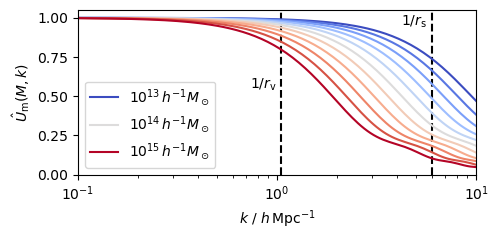

In [6]:
Umin = 0.
Umax = 1.05

xlaboff = 0.7
ylab = 0.83
colors = plt.cm.coolwarm(np.linspace(0, 1, nM))

plt.figure(figsize=(5, 2.5),dpi=100)
plt.axvline(kv_fid, color='black', ls='--')
plt.axvline(ks_fid, color='black', ls='--')
plt.text(xlaboff*kv_fid, 0.55, r'$1/r_\mathrm{v}$')
plt.text(xlaboff*ks_fid, 0.95, r'$1/r_\mathrm{s}$')
for iM in [0, (nM-1)//2, -1]:
    plt.plot(np.nan, color=colors[iM],  label='$10^{%d}\,h^{-1}M_\odot$'%(np.log10(Ms[iM])))
for i, Wk in enumerate(Wks_M):
    plt.plot(ks, Wk, color=colors[i])
plt.xscale('log')
plt.xlabel(r'$k$ / $h\,\mathrm{Mpc}^{-1}$')
plt.xlim((kmin, kmax))
plt.ylabel(r'$\hat{U}_\mathrm{m}(M, k)$')
plt.ylim((Umin, Umax))
plt.legend()
plt.tight_layout()
plt.savefig('plots/NFW_U.pdf',bbox_inches='tight')
plt.show()

Now we compare $\hat U$ functions defined with fixed concentration or fixed virial radius with the previous plot

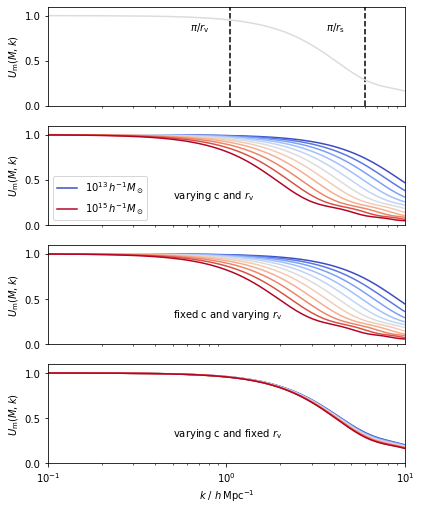

In [11]:
# Fill Wk arrays with varying M
cs = []; rvs = []; Wks_rv = []; Wks_c = []
for M in Ms:
    rv = halomod.virial_radius(M, Dv, Om_m)
    rvs.append(rv)
    c = halomod.conc_Duffy(M, z, halo_definition='Mvir')
    cs.append(c)
    Wks_rv.append(halomod.win_NFW(ks, rv, c_fid))
    Wks_c.append(halomod.win_NFW(ks, rv_fid, c))

    
# Plot
plt.subplots(3, 1, sharex=True, figsize=(6.4, 8.4))

xlaboff = 0.6
ylab = 0.83

plt.subplot(4, 1, 1)
plt.axvline(kv_fid, color='black', ls='--')
plt.axvline(ks_fid, color='black', ls='--')
plt.text(xlaboff*kv_fid, ylab, r'$\pi/r_\mathrm{v}$')
plt.text(xlaboff*ks_fid, ylab, r'$\pi/r_\mathrm{s}$')
plt.plot(ks, Wk, color=colors[(nM-1)//2])
plt.xscale('log')
plt.xticks([])
plt.xlim((kmin, kmax))
plt.ylabel(r'$U_\mathrm{m}(M, k)$')
plt.ylim((0., 1.1))

plt.subplot(4, 1, 2)
plt.text(0.5, 0.3, r'varying c and $r_{\rm v}$')
plt.plot(np.nan, color=colors[0],  label='$10^{%d}\,h^{-1}M_\odot$'%(np.log10(Ms[0])))
plt.plot(np.nan, color=colors[-1], label='$10^{%d}\,h^{-1}M_\odot$'%(np.log10(Ms[-1])))
for i, Wk in enumerate(Wks_M):
    plt.plot(ks, Wk, color=colors[i])
plt.xscale('log')
plt.xlim((kmin, kmax))
plt.xticks([])
plt.ylabel(r'$U_\mathrm{m}(M, k)$')
plt.ylim((0., 1.1))
plt.legend()

plt.subplot(4, 1, 3)
plt.text(0.5, 0.3, r'fixed c and varying $r_{\rm v}$')
for i, Wk in enumerate(Wks_rv):
    plt.plot(ks, Wk, color=colors[i])
plt.xscale('log')
plt.xlim((kmin, kmax))
plt.xticks([])
plt.ylabel(r'$U_\mathrm{m}(M, k)$')
plt.ylim((0., 1.1))

plt.subplot(4, 1, 4)
plt.text(0.5, 0.3, r'varying c and fixed $r_{\rm v}$')
for i, Wk in enumerate(Wks_c):
    plt.plot(ks, Wk, color=colors[i])
plt.xscale('log')
plt.xlabel(r'$k$ / $h\,\mathrm{Mpc}^{-1}$')
plt.xlim((kmin, kmax))
plt.ylabel(r'$U_\mathrm{m}(M, k)$')
plt.ylim((0., 1.1))

plt.show()